Visualisation des données fourni par les capteurs


In [48]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

In [132]:


# Specify the full path to your data file
file_path = r"C:\Users\gab1d\Documents\gitLabDeposit\IDA\stars971\stars971_2023-06.dat"


# Read the content of the file
with open(file_path, 'r') as file:
    data = file.read()

# Split the data into lines
lines = data.strip().split('\n')

# Extract the header and data
header = lines[35]
data_lines = lines[36:]

# Create a DataFrame
df = pd.read_csv(StringIO('\n'.join(data_lines)), sep=';', parse_dates=[0, 1])

# Set column names based on the header
header = [
    'UTC Date & Time',
    'Local Date & Time',
    'Enclosure Temperature',
    'Sky Temperature',
    'Frequency',
    'MSAS',
    'ZP'
]
df.columns = header
# Calculate the 'cloudClover' column and add it to the DataFrame
df['Cloud Cover'] = 100 - 3 * (df['Enclosure Temperature'] - df['Sky Temperature'])

# Now, the 'cloudClover' column has been added to the DataFrame

print("Infos header : \n",df.head())
print("Longueur :\n",len(df))




Infos header : 
       UTC Date & Time   Local Date & Time  Enclosure Temperature  \
0 2023-06-01 00:02:39 2023-06-01 00:02:39                   16.3   
1 2023-06-01 00:03:39 2023-06-01 00:03:39                   16.3   
2 2023-06-01 00:04:39 2023-06-01 00:04:39                   16.3   
3 2023-06-01 00:05:39 2023-06-01 00:05:39                   16.2   
4 2023-06-01 00:06:39 2023-06-01 00:06:39                   16.2   

   Sky Temperature  Frequency   MSAS   ZP  Cloud Cover  
0             -4.5       0.85  20.50  2.0         37.6  
1             -4.6       0.84  20.51  2.0         37.3  
2             -4.7       0.84  20.51  2.0         37.0  
3             -4.6       0.84  20.52  2.0         37.6  
4             -4.7       0.83  20.52  2.0         37.3  
Longueur :
 24014


Affichage Température

24014


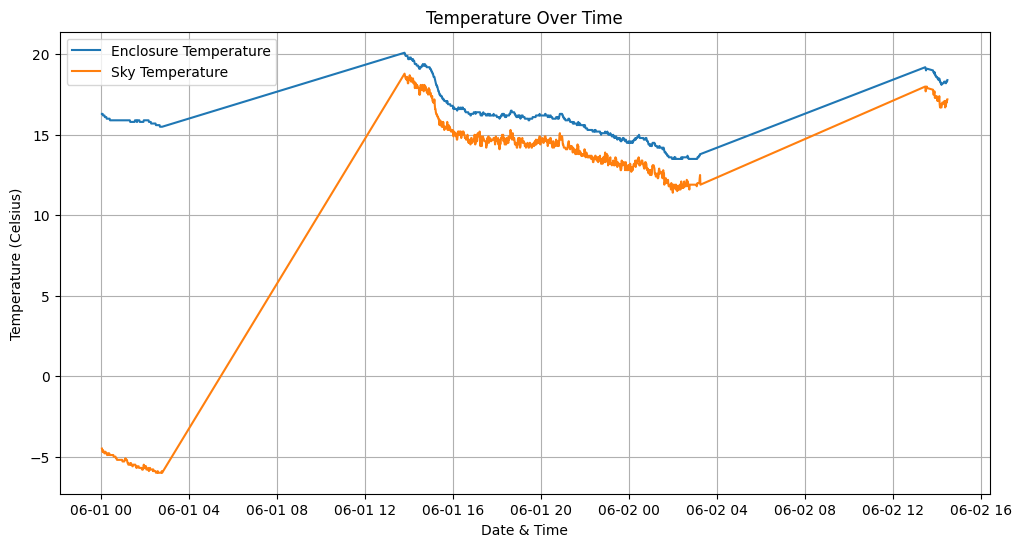

In [129]:
nbValTotal = len(df)
print(nbValTotal)
nbValTotal = 1000
# Create separate plots for Enclosure Temperature, Sky Temperature, Frequency, MSAS, and ZP
plt.figure(figsize=(12, 6))


# Plotting the Enclosure Temperature and Sky Temperature
plt.plot(df['UTC Date & Time'][0:nbValTotal], df['Enclosure Temperature'][0:nbValTotal], label='Enclosure Temperature')
plt.plot(df['UTC Date & Time'][0:nbValTotal], df['Sky Temperature'][0:nbValTotal], label='Sky Temperature')
plt.xlabel('Date & Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Over Time')
plt.legend()
plt.grid(True)

# Show the plots
plt.show()


24014


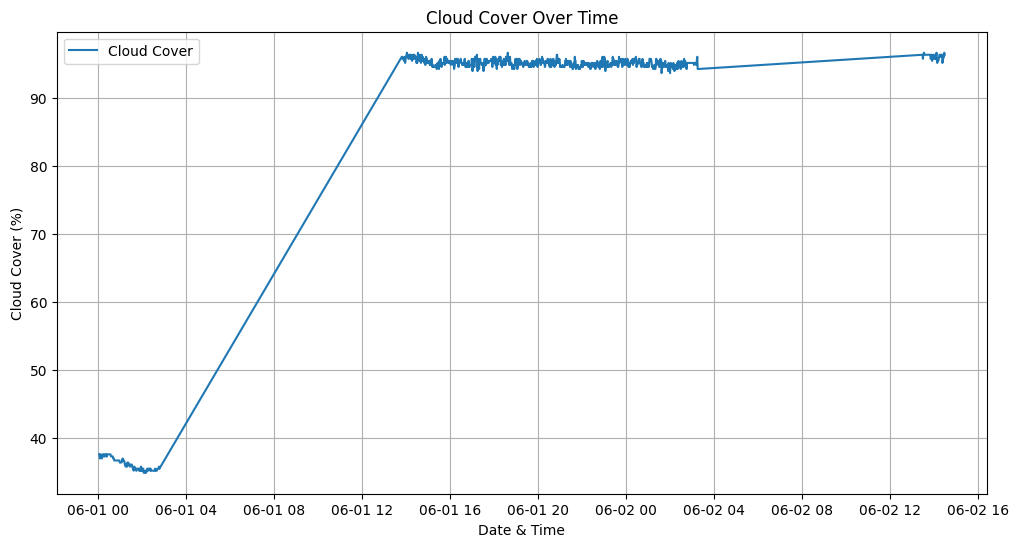

In [133]:
nbValTotal = len(df)
print(nbValTotal)
nbValTotal = 1000
# Create separate plots for Enclosure Temperature, Sky Temperature, Frequency, MSAS, and ZP
plt.figure(figsize=(12, 6))


# Plotting the Enclosure Temperature and Sky Temperature
plt.plot(df['UTC Date & Time'][0:nbValTotal], df['Cloud Cover'][0:nbValTotal], label='Cloud Cover')
plt.xlabel('Date & Time')
plt.ylabel('Cloud Cover (%)')
plt.title('Cloud Cover Over Time')
plt.legend()
plt.grid(True)

# Show the plots
plt.show()


<Figure size 1200x600 with 0 Axes>

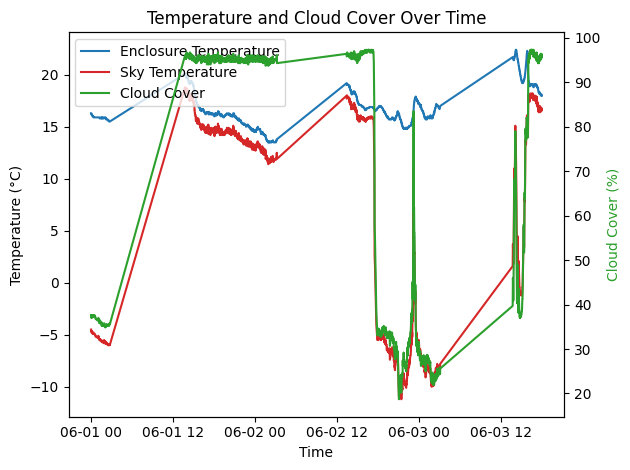

In [138]:
nbValTotal = 2000
# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots()

# Plot temperatures on the left y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)')
ax1.plot(df['Local Date & Time'][0:nbValTotal], df['Enclosure Temperature'][0:nbValTotal], label='Enclosure Temperature', color='tab:blue')
ax1.plot(df['Local Date & Time'][0:nbValTotal], df['Sky Temperature'][0:nbValTotal], label='Sky Temperature', color='tab:red')

# Create a second y-axis on the right for cloud cover percentages
ax2 = ax1.twinx()
ax2.set_ylabel('Cloud Cover (%)', color='tab:green')
ax2.plot(df['Local Date & Time'][0:nbValTotal], df['Cloud Cover'][0:nbValTotal], label='Cloud Cover', color='tab:green')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Set the title and show the plot
plt.title('Temperature and Cloud Cover Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


MSAS et Fréquence :

<Figure size 1200x600 with 0 Axes>

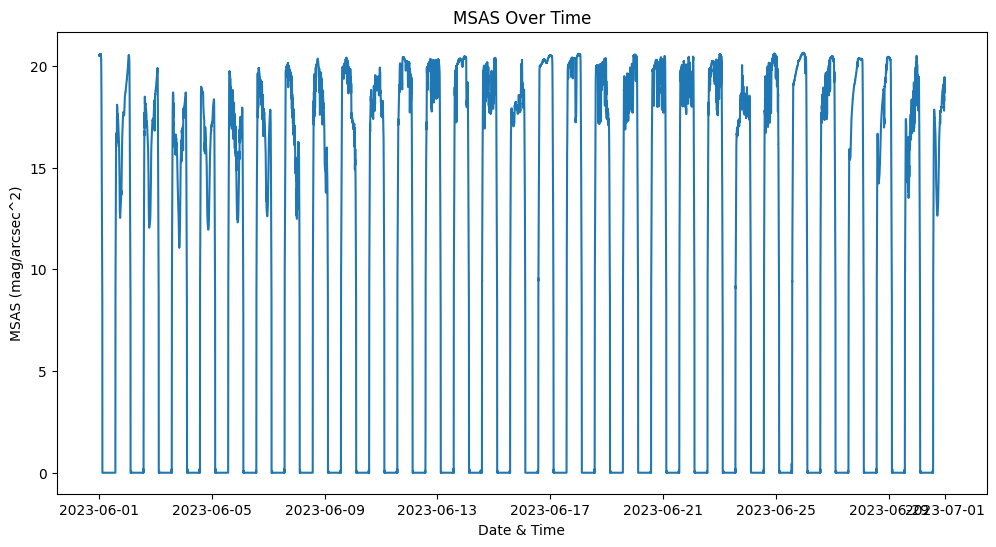

In [51]:
nbValTotal = len(df)
# nbValTotal = 800

plt.figure(figsize=(12, 6))
# Create a new figure for MSAS
plt.figure(figsize=(12, 6))

# MSAS plot
plt.plot(df['UTC Date & Time'][0:nbValTotal], df['MSAS'][0:nbValTotal])
plt.xlabel('Date & Time')
plt.ylabel('MSAS (mag/arcsec^2)')
plt.title('MSAS Over Time')


# Show the plots
plt.show()



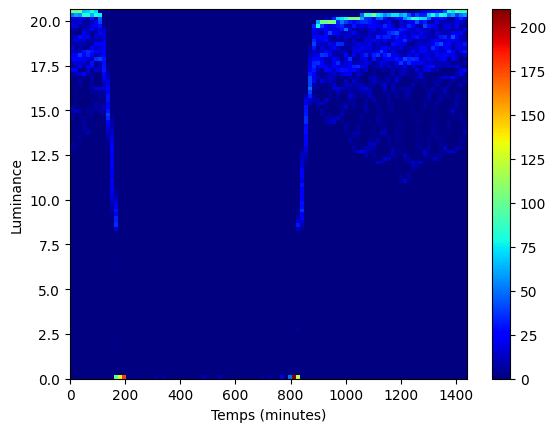

2023-06-01 00:02:39
20.5


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Convert the Timestamp column to Pandas Timestamp objects
df['UTC Date & Time'] = pd.to_datetime(df['UTC Date & Time'])

# Convert dates to numerical values representing time
dates = np.array([dt.hour * 60 + dt.minute for dt in df['UTC Date & Time']])
luminance_values = df['MSAS']

# Create the 2D histogram (heatmap)
plt.hist2d(dates, luminance_values, bins=(100, 100), cmap=plt.cm.jet)
plt.colorbar()

# Set axis labels
plt.xlabel('Temps (minutes)')
plt.ylabel('Luminance')

# Show the heatmap
plt.show()
print(df["UTC Date & Time"][0])
print(df["MSAS"][0])